# H2O Automated Machine Learning (AutoML)

## 0 Introduction
The objective of this notbook is to use to data generated from the previous notebooks to carry out Automated Machine Learning (AutoML) and captrure the important features at the underlying structure of signal peptides. In order to achieve this, the predictions of SignalP algorithm will be merged with the observations of Proteomics results obtained from the previous two notebooks, respectively. This will enable the observed signal peptides to be assigned with peptide abundance, while keeping the predicted signal peptides at zero abundance, thus generating a dataframe that emphasizes importance of signal peptides through the peptide abundance. 

### Agenda
- Generate dataframe for AutoML
- Utilize AutoML to carry out ML operations
- Determine the best AutoML model generated
- Analyze the best model parameters 
- Check AutoML prediction based on the best model

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
from google.colab import drive 
drive.mount('/content/home')

Mounted at /content/home


## 1 ML dataframe generation

In [11]:
# Load the mean proteomcis dataset and common signal peptide dataset obtained from previous notebooks
df_proteomcis_abundance_means = pd.read_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/04_Data_analysis_signal_peptides/proteomics_mean_peptide_abundances.csv')
df_signalP_predictions = pd.read_excel('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/01_SignalP_output/sigpep_predict.xlsx')

In [12]:
df_proteomcis_abundance_means

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944-T-p1,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300-T-p1,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075-T-p1,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355-T-p1,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,AO090001000680-T-p1,NaN,0.309596,389.333333,0.309596,NaN,NaN,9.818556e+04,0.000019


In [13]:
df_signalP_predictions

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


In [14]:
# Change the name to allow merge
df_signalP_predictions = df_signalP_predictions.rename(columns={'gene': 'Accession', 'end_pos': 'length'})

In [15]:
df_signalP_predictions

,Accession,start_pos,length,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


In [16]:
# Merge the dataframes
df_ML_signal_peptides = pd.merge(df_proteomcis_abundance_means, df_signalP_predictions, on='Accession', how='right')

# Set NaN values to zero
df_ML_signal_peptides.fillna(value=0, inplace=True)

# Create a new column that sorts the accession in a descending order to abundances observed in the raw data column
df_ML_signal_peptides['max_abundance'] = df_ML_signal_peptides[['MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']].max(axis=1)
df_ML_signal_peptides = df_ML_signal_peptides.sort_values(by='max_abundance', ascending=False)

df_ML_signal_peptides

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),start_pos,length,signal_peptide_likelyhood,sequence,max_abundance
318,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,0,20,0.999866,MMVAWWSLFLYGLQVAAPAL,1.047763e+10
269,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,0,27,0.999834,MEAFNLHNFLSSLYILLPFVILANPVH,1.494872e+09
1020,AO090103000076-T-p1,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,0,18,0.999835,MLRVSAIFMACLLLATAA,1.202415e+09
401,AO090026000003-T-p1,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,0,24,0.848574,MAVRIARFLGLSTVAYLALANGID,1.061096e+09
1011,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,0,24,0.999747,MVSFSSCLRALALGSSVLAVQPVL,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AO090026000252-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,18,0.999834,MQVKLFYTLALWAPILVS,0.000000e+00
423,AO090026000257-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,15,0.999809,MKSLIWALPFIPLAY,0.000000e+00
425,AO090026000367-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,22,0.999847,MWPTRSLSSLFFLSLALGSPVS,0.000000e+00
427,AO090026000428-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,22,0.999792,MLLPRLSSLLCLAGLATMPVAN,0.000000e+00


In [17]:
# Change the name for simplicity
df_ML_signal_peptides  = df_ML_signal_peptides.rename(columns={'MM + Nitrogen mean abundances (Raw-Normalized)': 'abundance',})

df_ML_signal_peptides = df_ML_signal_peptides[['sequence', 'length', 'abundance']]
df_ML_signal_peptides

,sequence,length,abundance
318,MMVAWWSLFLYGLQVAAPAL,20,1.000000
269,MEAFNLHNFLSSLYILLPFVILANPVH,27,0.417923
1020,MLRVSAIFMACLLLATAA,18,0.339312
401,MAVRIARFLGLSTVAYLALANGID,24,0.276919
1011,MVSFSSCLRALALGSSVLAVQPVL,24,0.218331
...,...,...,...
422,MQVKLFYTLALWAPILVS,18,0.000000
423,MKSLIWALPFIPLAY,15,0.000000
425,MWPTRSLSSLFFLSLALGSPVS,22,0.000000
427,MLLPRLSSLLCLAGLATMPVAN,22,0.000000


In [18]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_ML_signal_peptides.to_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/ML_signal_peptides.csv', index=False)

## 2 Data preparation for H2O AutoML

In [19]:
df_signalPP = pd.read_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/ML_signal_peptides.csv')
df_signalPP

,sequence,length,abundance
0,MMVAWWSLFLYGLQVAAPAL,20,1.000000
1,MEAFNLHNFLSSLYILLPFVILANPVH,27,0.417923
2,MLRVSAIFMACLLLATAA,18,0.339312
3,MAVRIARFLGLSTVAYLALANGID,24,0.276919
4,MVSFSSCLRALALGSSVLAVQPVL,24,0.218331
...,...,...,...
1056,MQVKLFYTLALWAPILVS,18,0.000000
1057,MKSLIWALPFIPLAY,15,0.000000
1058,MWPTRSLSSLFFLSLALGSPVS,22,0.000000
1059,MLLPRLSSLLCLAGLATMPVAN,22,0.000000


In [20]:
describe = df_signalPP["sequence"].describe()
describe 

count                     1061
unique                    1058
top       MMVAWWSLFLYGLQVAAPAL
freq                         3
Name: sequence, dtype: object

In [21]:
describe = df_signalPP["length"].describe()
describe

count    1061.000000
mean       21.388313
std         6.170687
min        12.000000
25%        18.000000
50%        20.000000
75%        24.000000
max        68.000000
Name: length, dtype: float64

In [22]:
describe = df_signalPP["abundance"].describe()
describe

count    1061.000000
mean        0.003158
std         0.037310
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: abundance, dtype: float64

In [23]:
def split_peptides_sequences(df_signalPP:pd.DataFrame): 
    '''Split each AA for each position'''
    peptides_split = []
    for k,v in df_signalPP.iterrows(): 
        sequence = []
        for seq in v['sequence']: 
            sequence.append(seq)
        peptides_split.append(sequence)
    
    # make a dataframe
    new_peptides = pd.DataFrame(peptides_split)
    new_peptides = new_peptides.fillna('-')

    return new_peptides

In [24]:
df_signalPP_split = split_peptides_sequences(df_signalPP)
df_signalPP_split

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,M,M,V,A,W,W,S,L,F,L,...,-,-,-,-,-,-,-,-,-,-
1,M,E,A,F,N,L,H,N,F,L,...,-,-,-,-,-,-,-,-,-,-
2,M,L,R,V,S,A,I,F,M,A,...,-,-,-,-,-,-,-,-,-,-
3,M,A,V,R,I,A,R,F,L,G,...,-,-,-,-,-,-,-,-,-,-
4,M,V,S,F,S,S,C,L,R,A,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,M,Q,V,K,L,F,Y,T,L,A,...,-,-,-,-,-,-,-,-,-,-
1057,M,K,S,L,I,W,A,L,P,F,...,-,-,-,-,-,-,-,-,-,-
1058,M,W,P,T,R,S,L,S,S,L,...,-,-,-,-,-,-,-,-,-,-
1059,M,L,L,P,R,L,S,S,L,L,...,-,-,-,-,-,-,-,-,-,-


In [25]:
df_signalPP_split['abundance'] = df_signalPP['abundance']
df_signalPP_split

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,abundance
0,M,M,V,A,W,W,S,L,F,L,...,-,-,-,-,-,-,-,-,-,1.000000
1,M,E,A,F,N,L,H,N,F,L,...,-,-,-,-,-,-,-,-,-,0.417923
2,M,L,R,V,S,A,I,F,M,A,...,-,-,-,-,-,-,-,-,-,0.339312
3,M,A,V,R,I,A,R,F,L,G,...,-,-,-,-,-,-,-,-,-,0.276919
4,M,V,S,F,S,S,C,L,R,A,...,-,-,-,-,-,-,-,-,-,0.218331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,M,Q,V,K,L,F,Y,T,L,A,...,-,-,-,-,-,-,-,-,-,0.000000
1057,M,K,S,L,I,W,A,L,P,F,...,-,-,-,-,-,-,-,-,-,0.000000
1058,M,W,P,T,R,S,L,S,S,L,...,-,-,-,-,-,-,-,-,-,0.000000
1059,M,L,L,P,R,L,S,S,L,L,...,-,-,-,-,-,-,-,-,-,0.000000


## 3 H2O AutoML

In [26]:
%%capture 
!pip install h2o

In [27]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

In [28]:
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_n3qxpe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
df_test = h2o.H2OFrame(df_signalPP_split)
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1061
Cols:69

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,abundance
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,int,enum,int,int,int,int,int,int,int,real
mins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,,,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,,,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003157757935910452
maxs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,,,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sigma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,,,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03730967489556199
zeros,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1056,,,1057,,1059,1059,1059,1060,1060,1060,1060,819
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,4,0,2,2,2,1,1,1,1,0
0,M,M,V,A,W,W,S,L,F,L,Y,G,L,Q,V,A,A,P,A,L,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,M,E,A,F,N,L,H,N,F,L,S,S,L,Y,I,L,L,P,F,V,I,L,A,N,P,V,H,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4179234540632222
2,M,L,R,V,S,A,I,F,M,A,C,L,L,L,A,T,A,A,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339312307761118


Some of the training columns are assigned as "int" type. Lets convert the "int" terms into "enum" type to be able to represent them as categorical data for H2OFrame.

In [30]:
for column in df_test.columns:
    if column != 'abundance':
        df_test[column] = df_test[column].asfactor()

In [31]:
df_test.describe()

Rows:1061
Cols:69

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,abundance
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real
mins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0
mean,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.003157757935910452
maxs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0
sigma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.03730967489556199
zeros,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,819
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,4,0,2,2,2,1,1,1,1,0
0,M,M,V,A,W,W,S,L,F,L,Y,G,L,Q,V,A,A,P,A,L,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,0,-,0,0,0,0,0,0,0,1.0
1,M,E,A,F,N,L,H,N,F,L,S,S,L,Y,I,L,L,P,F,V,I,L,A,N,P,V,H,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,0,-,0,0,0,0,0,0,0,0.4179234540632222
2,M,L,R,V,S,A,I,F,M,A,C,L,L,L,A,T,A,A,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,0,-,0,0,0,0,0,0,0,0.339312307761118


Lets set arguments and train an AutoML. However, before we do that, it is important to emphasize that the validation of the models is aimed to be done internally by using K-fold cross-validation to avoid data sacrifice and statistical issues with the validation split. 

Hence, once the models are generated, the validation of the best models will be done by checking the cross-validation metrics to confirm the stability of the model estimations. 

More information: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html

In [53]:
# Select the columns we want to train on
feature_cols = [str(i) for i in range(0,35)]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs = 0,  # 1 hour = int(3600 * 1), (max_runtime_secs=0 sets for unlimited time)
    max_models = None,     # None =  no limit in the number of model generation
    nfolds = 10,           # Number of folds for k-fold cross-validation (nfolds == 0 disables cross-validation)
    seed = 1,              # Reproducibility
    sort_metric = "MAE",   # Metric to be used for the sorting of the models generated
    keep_cross_validation_predictions = True  
    )

In [ ]:
%%time
# Train the AutoML model
AutoML.train(
    x = feature_cols,
    y = 'abundance',
    training_frame = df_test,
    )   

AutoML progress: |
09:37:06.968: _train param, Dropping bad and constant columns: [0]

██
09:37:16.994: _train param, Dropping bad and constant columns: [0]


09:37:21.150: _train param, Dropping bad and constant columns: [0]

██
09:37:29.0: _train param, Dropping unused columns: [0]


09:37:29.925: _train param, Dropping bad and constant columns: [0]

█
09:37:34.220: _train param, Dropping bad and constant columns: [0]

██
09:37:51.604: _train param, Dropping bad and constant columns: [0]


09:37:56.758: _train param, Dropping bad and constant columns: [0]

█
09:38:02.915: _train param, Dropping bad and constant columns: [0]

█
09:38:06.711: _train param, Dropping unused columns: [0]


09:38:07.108: _train param, Dropping unused columns: [0]
09:38:07.513: _train param, Dropping bad and constant columns: [0]

█
09:38:11.120: _train param, Dropping bad and constant columns: [0]

████
09:38:24.644: _train param, Dropping bad and constant columns: [0]


09:38:28.777: _train param, Droppin

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20230227_93706_model_1


Status of Neuron Layers: predicting abundance, regression, gaussian distribution, Quadratic loss, 80,201 weights/biases, 951.6 KB, 97,796 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  ---------------------  -------------------  --------------------  -----------------------
    1        699      Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.263306320810279     0.25087201595306396   0.0         0.0009048234002403791  0.05243368446826935  0.6243537541100125    0.2659674882888794
    3        100      RectifierDropout  10.0       0.0   0.0   0.07914522673142418   0.1878076195716858    0.0         -0.015559713990709496  0.10085111856460571  0.9453514513946187    0.025221779942512512
    4        1        Linear                       0.0   0.0   0.005328167571117319  0.004937188699841499  0.0         0.0056502772503881716  0.10254764556884766  -0.05812382884646851  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.001363724086701036
RMSE: 0.036928635050608574
MAE: 0.005014297734015401
RMSLE: 0.02776762170407344
Mean Residual Deviance: 0.001363724086701036

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.0013877140811970174
RMSE: 0.03725203459137524
MAE: 0.0053337136286591615
RMSLE: 0.028131524226308647
Mean Residual Deviance: 0.0013877140811970174

Cross-Validation Metrics Summary: 
                        mean        sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ----------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.00532668  0.00324012  0.0127872     0.0075377     0.00708681    0.00550365    0.00540724    0.00426572    0.00322661    0.0031835     0.00175395    0.00251447
mean_residual_deviance  0.00138026  0.00282804  0.00928892    0.00163151    0.00109804    0.000717849   0.000453181   0.000367993   0.000138899   1.51342e-05   5.45963e-05   3.64845e-05
mse                     0.00138026  0.00282804  0.00928892    0.00163151    0.00109804    0.000717849   0.000453181   0.000367993   0.000138899   1.51342e-05   5.45963e-05   3.64845e-05
r2                      -0.0707487  0.210102    -0.00373282   0.00254866    0.00047737    0.00268168    0.00010834    -0.0036727    0.00152405    -0.668226     -0.0197203    -0.0194753
residual_deviance       0.00138026  0.00282804  0.00928892    0.00163151    0.00109804    0.000717849   0.000453181   0.000367993   0.000138899   1.51342e-05   5.45963e-05   3.64845e-05
rmse                    0.0266276   0.0273095   0.096379      0.0403919     0.0331367     0.0267927     0.021288      0.0191831     0.0117856     0.00389027    0.00738893    0.00604024
rmsle                   0.0217692   0.0186794   0.0667486     0.0337567     0.0286222     0.0236656     0.0193001     0.0175268     0.0111606     0.00386886    0.00716088    0.00588139

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-02-27 10:22:39  0.000 sec                           0         0             0          nan              nan  

In [ ]:
# View the AutoML Leaderboard
leaderboard = AutoML.leaderboard
leaderboard.head(rows=leaderboard.nrows)  # Print all rows instead of default (10 rows)

In [ ]:
# Select the model performed the best according to the sorting metric
best_model = AutoML.get_best_model()
best_model_name = best_model.key

In [ ]:
# Save the leaderbord ids and beset model
out_path = '/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_H2O_AutoML_output'
mdl = h2o.get_model(best_model_name)
h2o.save_model(model=mdl, path=out_path, force=True)

'/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_H2O_AutoML_output/DeepLearning_grid_2_AutoML_1_20230227_93706_model_1'

## 4 AutoML model analysis

In [32]:
best_model = h2o.load_model("/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_H2O_AutoML_output/m30_DRF_1_AutoML_1_20230220_170537")
print(best_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230220_170537


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 37                          88739                  19           20           19.973        136           219           184.622

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0016584398069097528
RMSE: 0.040723946357269364
MAE: 0.005297624901332574
RMSLE: 0.0315349957378654
Mean Residual Deviance: 0.0016584398069097528

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.001720611709543464
RMSE: 0.0414802568644827
MAE: 0.0054603678907358425
RMSLE: 0.03209598415116956
Mean Residual Deviance: 0

In [ ]:
# Shut down the h2o server
h2o.shutdown()

In [41]:
# Retrieve the stored cross-validation (cv) holdout predictions
cv_hold_predictions = best_model.predict(df_test).as_data_frame()
cv_hold_predictions

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict
0,3.034909e-01
1,2.661483e-01
2,2.201214e-01
3,1.721860e-01
4,1.416716e-01
...,...
1056,3.380116e-07
1057,1.276353e-03
1058,7.948172e-06
1059,1.140028e-02


In [39]:
df_test_as_df = df_test.as_data_frame()
df_test_as_df

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,abundance
0,M,M,V,A,W,W,S,L,F,L,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,M,E,A,F,N,L,H,N,F,L,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417923
2,M,L,R,V,S,A,I,F,M,A,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339312
3,M,A,V,R,I,A,R,F,L,G,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276919
4,M,V,S,F,S,S,C,L,R,A,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,M,Q,V,K,L,F,Y,T,L,A,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1057,M,K,S,L,I,W,A,L,P,F,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1058,M,W,P,T,R,S,L,S,S,L,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1059,M,L,L,P,R,L,S,S,L,L,...,0.0,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [56]:
df_signalP_abundance_and_ML_predictions = pd.merge(df_test_as_df, cv_hold_predictions, left_index=True, right_index=True).sort_values(by= 'abundance', ascending = False).reset_index()
df_signalP_abundance_and_ML_predictions = df_signalP_abundance_and_ML_predictions.rename(columns={'predict': 'cv_hold_predictions'})
df_signalP_abundance_and_ML_predictions

,index,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,abundance,cv_hold_predictions
0,0,M,M,V,A,W,W,S,L,F,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.303491
1,1,M,E,A,F,N,L,H,N,F,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417923,0.266148
2,2,M,L,R,V,S,A,I,F,M,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339312,0.220121
3,3,M,A,V,R,I,A,R,F,L,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276919,0.172186
4,4,M,V,S,F,S,S,C,L,R,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218331,0.141672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,515,M,L,P,N,L,G,I,L,I,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000066
1057,516,M,K,I,A,S,I,S,A,I,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002123
1058,517,M,S,D,T,V,Q,K,L,C,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000073
1059,518,M,S,F,S,K,V,A,I,V,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000142


In [57]:
df_signalP_abundance_and_ML_predictions['observed_abundance_pct'] = df_signalP_abundance_and_ML_predictions['abundance'].rank(pct=True)
df_signalP_abundance_and_ML_predictions['predicted_abundance_pct'] = df_signalP_abundance_and_ML_predictions['cv_hold_predictions'].rank(pct=True)
df_signalP_abundance_and_ML_predictions

,index,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,abundance,cv_hold_predictions,observed_abundance_pct,predicted_abundance_pct
0,0,M,M,V,A,W,W,S,L,F,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.303491,1.000000,0.999057
1,1,M,E,A,F,N,L,H,N,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.417923,0.266148,0.999057,0.997172
2,2,M,L,R,V,S,A,I,F,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.339312,0.220121,0.998115,0.996230
3,3,M,A,V,R,I,A,R,F,L,...,0.0,0.0,0.0,0.0,0.0,0.0,0.276919,0.172186,0.997172,0.995287
4,4,M,V,S,F,S,S,C,L,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.218331,0.141672,0.996230,0.994345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,515,M,L,P,N,L,G,I,L,I,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000066,0.386428,0.423186
1057,516,M,K,I,A,S,I,S,A,I,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002123,0.386428,0.899152
1058,517,M,S,D,T,V,Q,K,L,C,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000073,0.386428,0.450518
1059,518,M,S,F,S,K,V,A,I,V,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000142,0.386428,0.566447


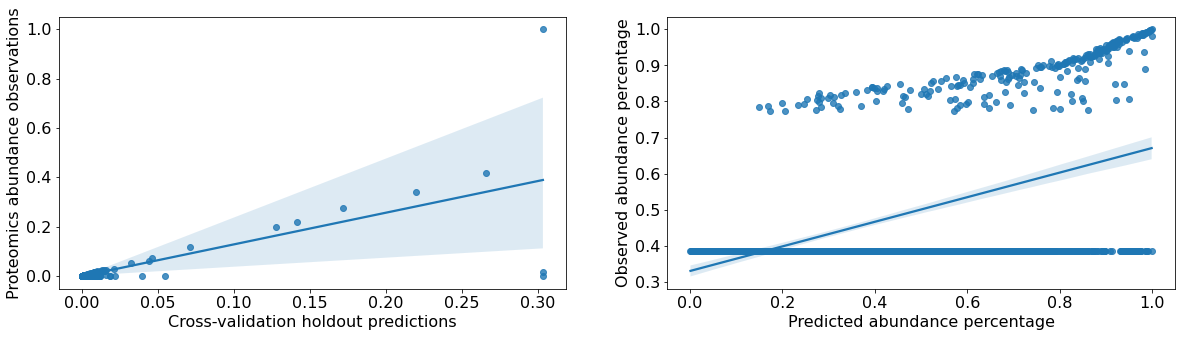

In [67]:
# Set the font size before creating any plot elements
plt.rc('font', size=16)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

# Plot the first plot in the left subplot
sns.regplot(x='cv_hold_predictions', y='abundance', data=df_signalP_abundance_and_ML_predictions, ax=axs[0])
axs[0].set_xlabel('Cross-validation holdout predictions')
axs[0].set_ylabel('Proteomics abundance observations')

# Plot the second plot in the right subplot
sns.regplot(x='predicted_abundance_pct', y='observed_abundance_pct', data=df_signalP_abundance_and_ML_predictions, ax=axs[1])
axs[1].set_xlabel('Predicted abundance percentage')
axs[1].set_ylabel('Observed abundance percentage')

plt.show()